<a href="https://colab.research.google.com/github/shahzarhusain/Aerofit_analysis/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

# Basic Data Exploration

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum().sum()

0

**Our data seems to be saved in correct data types and does not contains any null values. Yippee!!**

Product Purchased:	KP281, KP481, or KP781 <br>
Age:	In years<br>
Gender:	Male/Female<br>
Education:	In years<br>
MaritalStatus:	Single or partnered<br>
Usage:	The average number of times the customer plans to use the treadmill each week.<br>
Income:	Annual income (in $)<br>
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.<br>
Miles:	The average number of miles the customer expects to walk/run each week<br>

In [6]:
for col in df.columns:
  print("Unique values in", col, "are",df[col].nunique())

Unique values in Product are 3
Unique values in Age are 32
Unique values in Gender are 2
Unique values in Education are 8
Unique values in MaritalStatus are 2
Unique values in Usage are 6
Unique values in Fitness are 5
Unique values in Income are 62
Unique values in Miles are 37


In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


With the basic view, we can see that:
1. We have **3 unique products** in our dataset.
2. **Age ranges from 18 to 50** and majority of the users are below 33 years.
3. We have **more male** users than female.
4. All of the users have **at least 12 years of education**
5. Aprox **60% users in our dataset are married**
6. Users plan to use the treadmill **at least 3 days a week.**
7. There is a **wide distibution for income** i.e. we have user with income as low as **29k per year to 100k** per year.

# Data Visualisation

<Figure size 1440x1440 with 0 Axes>

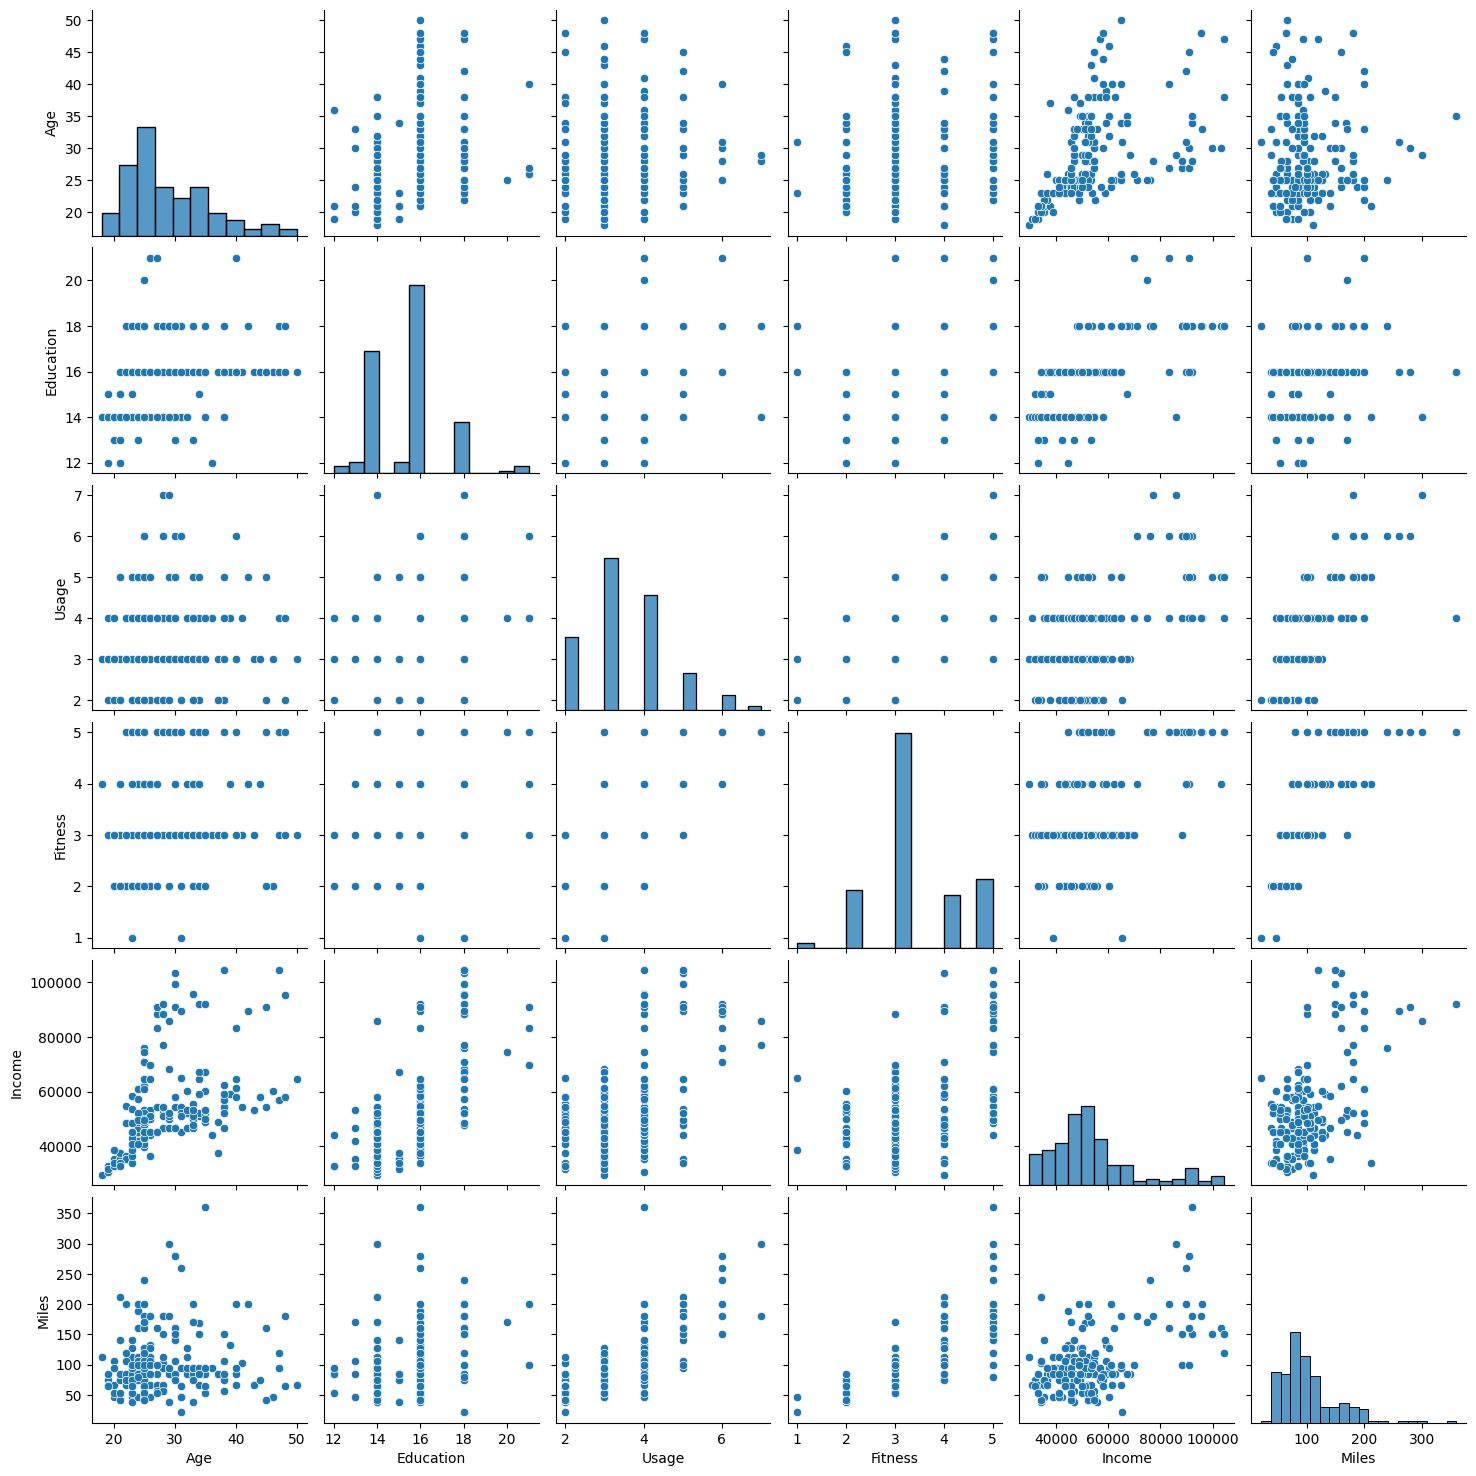

In [ ]:
plt.figure(figsize = (12,12), dpi = 120)
sns.pairplot(data = df)
plt.show()

## Univariate Analysis

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# as given, the product prices are
product = ['KP281','KP481','KP781']
prices = [1500,1750,2500]

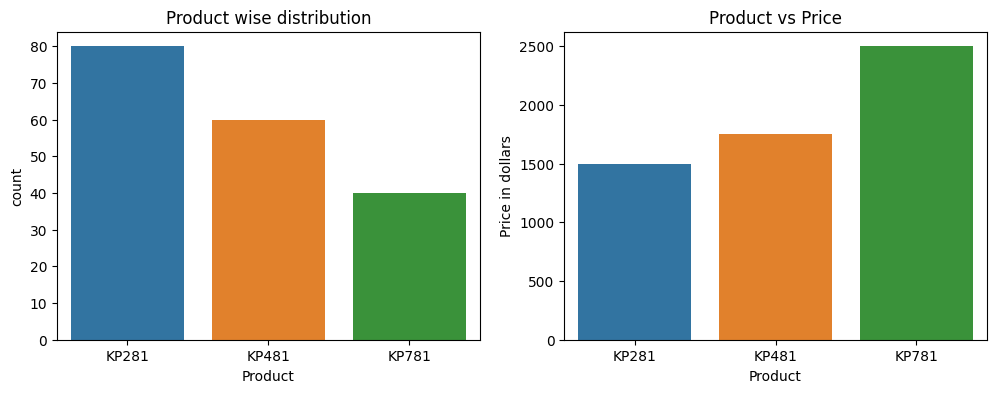

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols=2, figsize = (12,4))

sns.countplot(data = df, x = 'Product', ax = axis[0])
axis[0].set_title('Product wise distribution')
sns.barplot(x = product, y = prices, ax = axis[1])
plt.xlabel('Product')
plt.ylabel('Price in dollars')
axis[1].set_title('Product vs Price')
plt.show()

We can clearly see that the most selling product is the KP281. Also, the KP281 seems to be the cheapest among all 3 products.

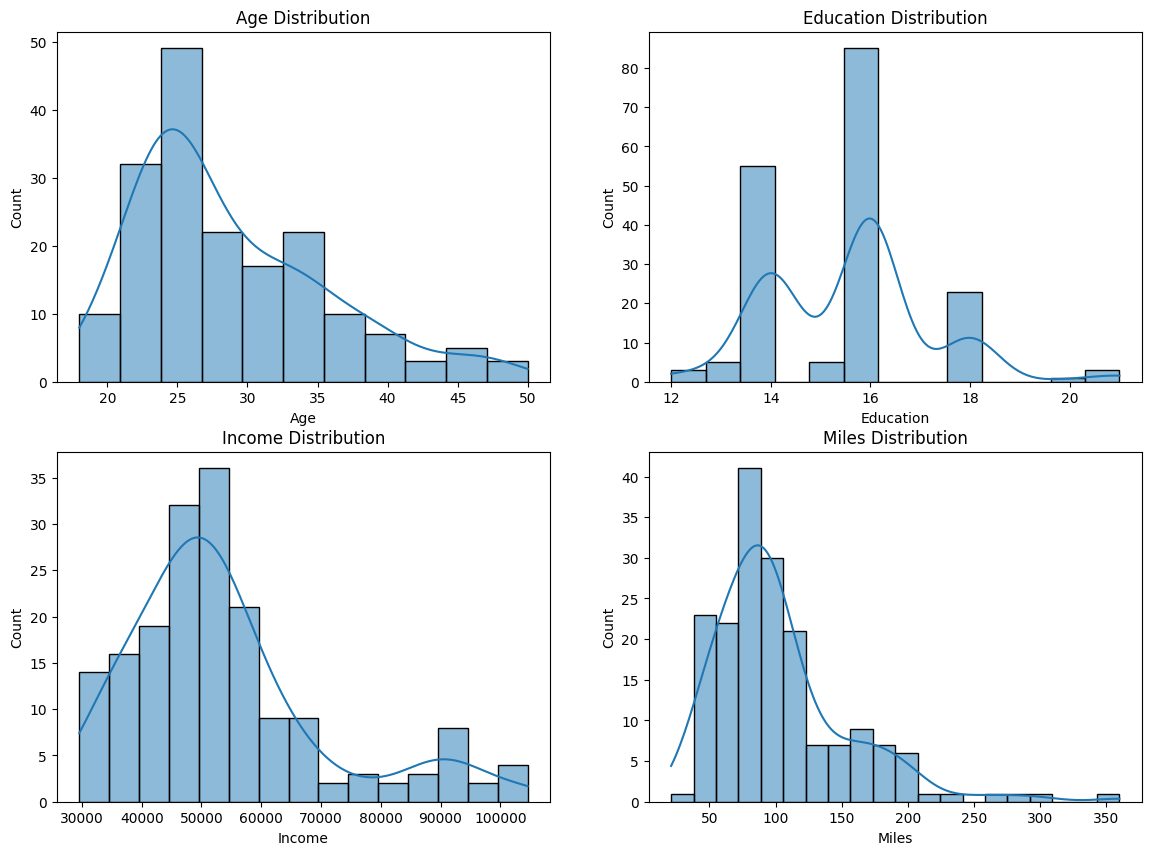

In [ ]:
# let's see the numerical data distribution in our data
fig , axis = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))

sns.histplot(data = df, x = 'Age', kde = True, ax = axis[0,0])
axis[0,0].set_title('Age Distribution')
sns.histplot(data = df, x = 'Education', kde = True, ax = axis[0,1])
axis[0,1].set_title('Education Distribution')
sns.histplot(data = df, x = 'Income', kde = True, ax = axis[1,0])
axis[1,0].set_title('Income Distribution')
sns.histplot(data = df, x = 'Miles', kde = True, ax = axis[1,1])
axis[1,1].set_title('Miles Distribution')

plt.show()

**Insights:** <br>
**Age** - Our Age column seems to be right skewed and also, 50% of the users are below 26 years of Age. <br>
**Education** - There are very few people having more than 16 years of education.<br>
**Income** - Majority of the people in our dataset seems to be earning annually in range of 40-60k dollars. However, it seems that irrespective of their income, people are inclined towards the fitness and investing in any one the equipment.<br>
**Miles** - A large number of portion is expecting to walk/run 40 miles in a week i.e. approx 10k steps a day. 10k steps a day seems to be a widely accepted number for people who wants to maintain a light health routine.

In [ ]:
df.describe()['Age']

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

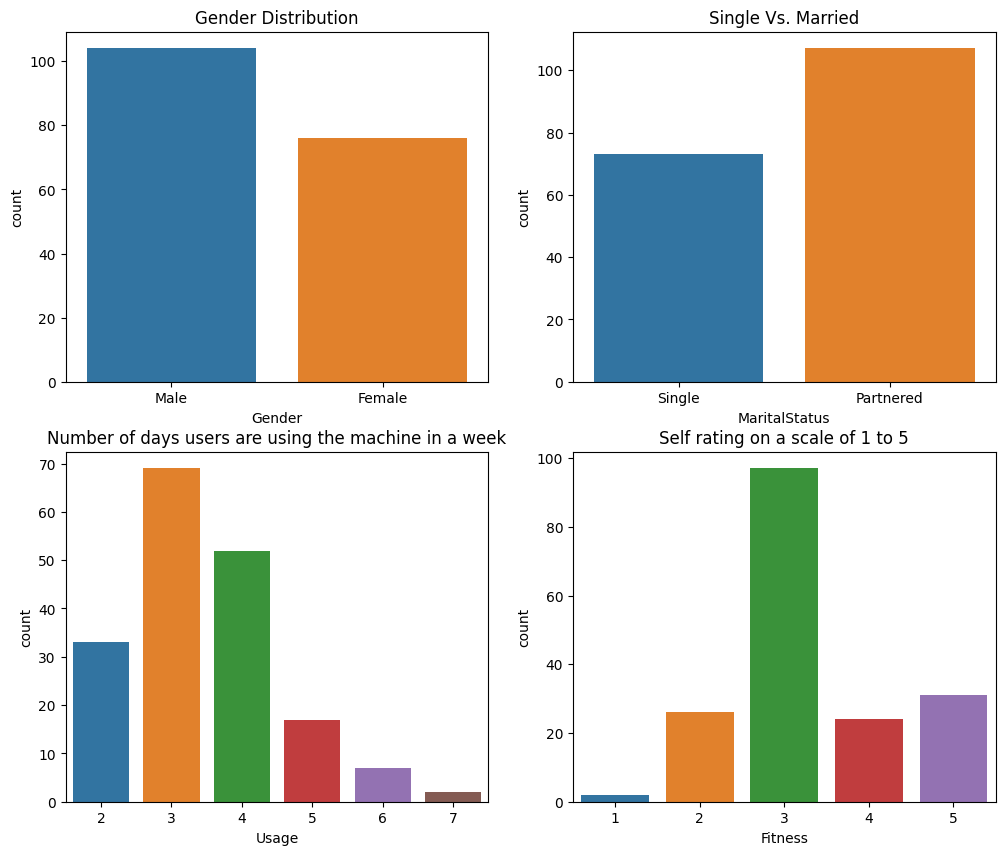

In [ ]:
# for categorical features

fig, axis = plt.subplots(nrows = 2, ncols=2, figsize = (12,10))

sns.countplot(data = df, x = 'Gender', ax= axis[0,0])
axis[0,0].set_title('Gender Distribution')
sns.countplot(data = df, x = 'MaritalStatus', ax = axis[0,1])
axis[0,1].set_title('Single Vs. Married')
sns.countplot(data = df, x = 'Usage', ax = axis[1,0])
axis[1,0].set_title('Number of days users are using the machine in a week')
sns.countplot(data = df, x = 'Fitness', ax = axis[1,1])
axis[1,1].set_title('Self rating on a scale of 1 to 5')
plt.show()

**Insights**
1. **Gender** - As discussed before, there are more male users than the female
2. **Marital Status** - Surprisingly, married peopele seems to be more inclined in comarison to the single one.
3. **Usage** - Majority of the people prefer to workout 3-4 days.
4. **Fitness** - This is an interesting insight. As this is a self rated parameter. It seems that people are not confident about their fitness and majority of them rated 3. Neither fit nor healthy.

In [ ]:
# OUTLIERS DETECTION - we have numerical columns as Age, Education, Usage, Fitness, Income and Miles. For Usage and Fitness we have a limited range i.e. 1-7 and 1-5 respectively.
# Still we will double check our data.
print('Range for Usage is ', df.Usage.min(), ' to ', df.Usage.max())
print('Range for Usage is ', df.Fitness.min(), ' to ', df.Fitness.max())

Range for Usage is  2  to  7
Range for Usage is  1  to  5


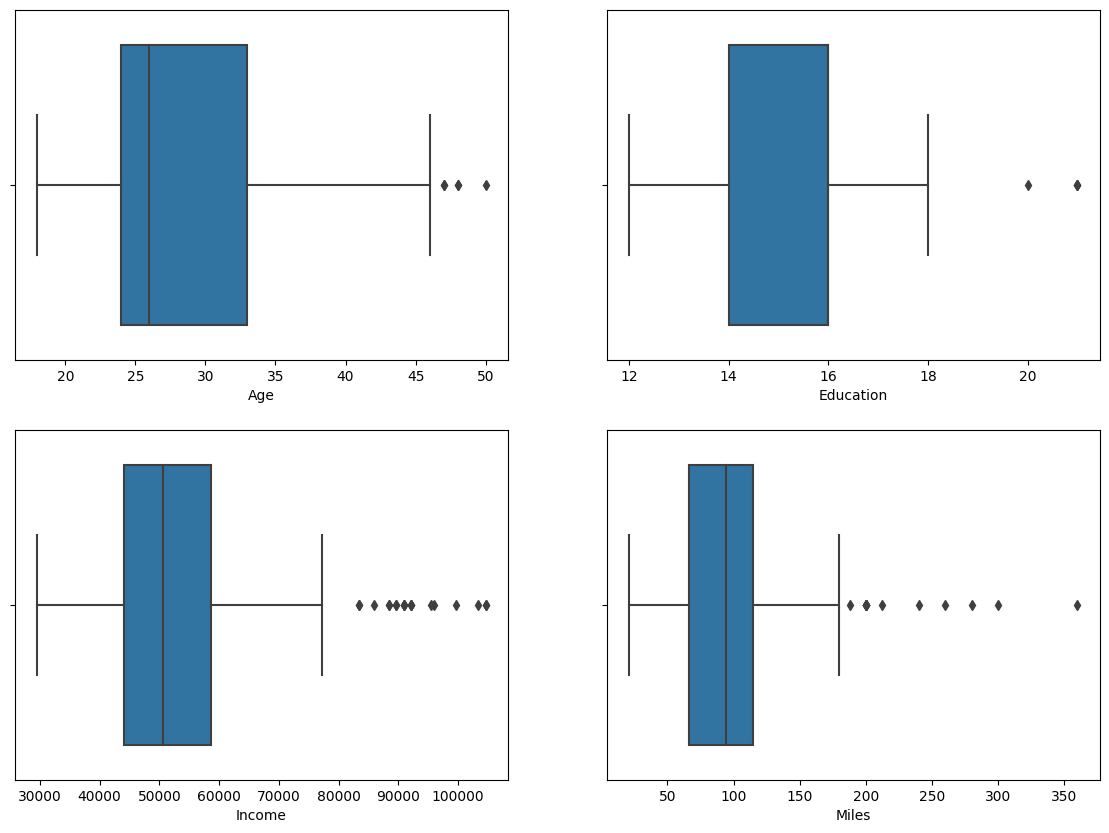

In [ ]:
#Now, let's check for other columns
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))

sns.boxplot(data = df, x = 'Age', ax = axis[0,0])
sns.boxplot(data = df, x = 'Education', ax = axis[0,1])
sns.boxplot(data = df, x = 'Income', ax = axis[1,0])
sns.boxplot(data = df, x = 'Miles', ax = axis[1,1])
plt.show()

# Bivariate Analysis

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
round(pd.crosstab(df['Product'], df['Fitness'], margins = True, normalize = True)*100,2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
All,1.11,14.44,53.89,13.33,17.22,100.00


In [ ]:
pd.crosstab(df['Product'], df['Fitness'],values = df['Income'], aggfunc= np.median, margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,38658.0,46048.5,46617.0,44343.0,47754.0,46617.0
KP481,65220.0,45480.0,50028.0,48322.5,NaN,49459.5
KP781,NaN,NaN,67231.0,70966.0,83416.0,76568.5
All,51939.0,45480.0,48891.0,49459.5,77191.0,50596.5


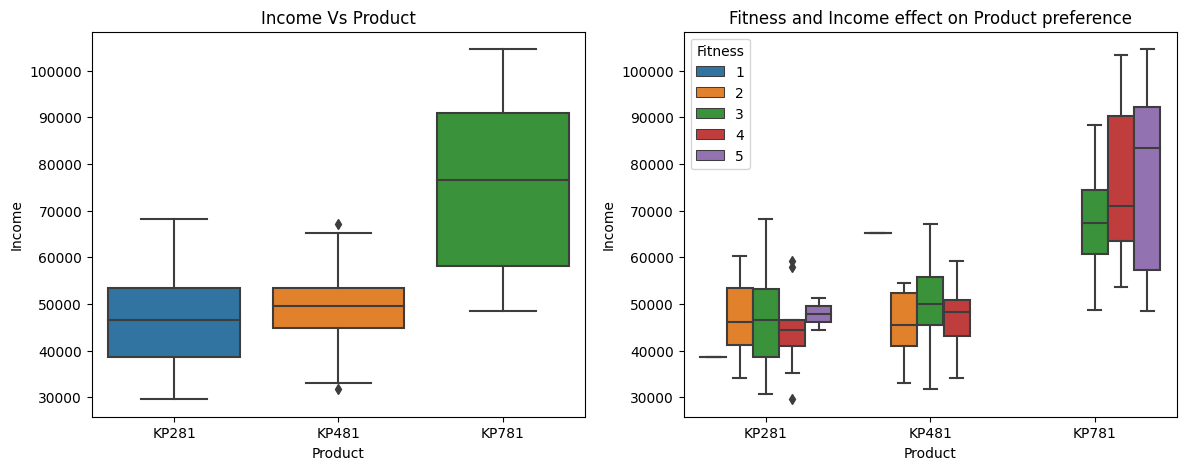

In [ ]:
fig, axis = plt.subplots(ncols = 2, figsize = (14,5))
sns.boxplot(data = df, x = 'Product', y = 'Income', ax = axis[0])
axis[0].set_title('Income Vs Product')
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Fitness', ax = axis[1])
axis[1].set_title('Fitness and Income effect on Product preference')
plt.show()

With the above analysis on Fitness level, Product Category and Income, we can see a direct relationship of Income on the product preference.

A higher income individual will prefer to invest more and go for the most expensive product available.

Also, we can see that people rating themselves 3 & 4 have a good distribution for all 3 products. However, the median income for KP481 still seems to be a little higher than the people going for KP281.

One more fact we analysed is that only the people who are strongly confident with their fitness level and are also earning more, going for the KP781. Let's see if they are professional i.e. walk/run more than the average people.

In [ ]:
pd.crosstab(df['Product'], df['Fitness'], values = df['Miles'], aggfunc=np.median, margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,47.0,47.0,85.0,113.0,178.5,85.0
KP481,21.0,53.0,95.0,116.5,NaN,85.0
KP781,NaN,NaN,100.0,160.0,170.0,160.0
All,34.0,47.0,85.0,127.0,170.0,94.0


<Axes: xlabel='Income', ylabel='Miles'>

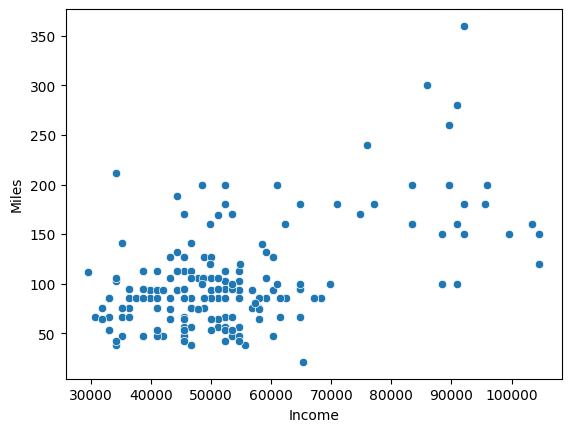

In [ ]:
sns.scatterplot(data = df, x = 'Income', y = 'Miles')

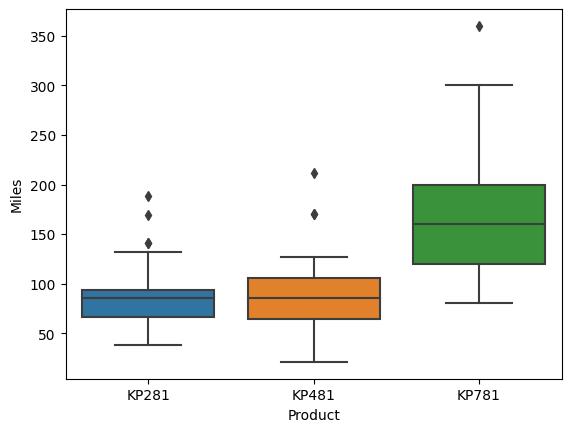

In [ ]:
sns.boxplot(data = df, x = 'Product', y = 'Miles')
#axis[1].set_title('Fitness and Income effect on Product preference')
plt.show()

It seems that costlier the version, the more feature it provides. As we can see that people who are walking/running more and rate themselves good in fitness are using the higher variant.

In [ ]:
a

In [ ]:
px.scatter(df, x = 'Age', y = 'Income', size = 'Miles', color = 'MaritalStatus')